# Improving NN with Dropout

The idea is improving baseline (previous trained model) from 94.5% on training, 94.63% on validation and 94.41% on test.

Dropout is a regularization technique that consists of ramdonly choosing and killing neurons.

In [47]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
import time
import matplotlib.pyplot as plt



In [48]:
def plot_keras_history(history, epochs, title):
    epoch_count = list(range(1, epochs+1))
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.xticks(epoch_count, epoch_count)
    plt.show()

In [49]:
def create_model_with_dropouts():
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT)) # DROPOUT = 0.3
    model.add(Dense(N_HIDDEN)) # N_HIDDEN = 128
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT)) # DROPOUT = 0.3
    model.add(Dense(NB_CLASSES)) # NB_CLASSES = 10
    model.add(Activation('softmax'))
    return model

In [50]:
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam(lr=0.001) #RMSprop() #SGD() 
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
RESHAPED = 784

In [51]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

### Improving with diferent optimizers
Besides improving the neural network loss with dropouts as above, the neural network can be also be improved by trying different epochs and optimizers. The code below shows the effect of trying different optimizers in the same NN architecture with a fixed number of epochs.

In [52]:
optimizers = { 'SGD':SGD(), 'RMSprop':RMSprop(), 'Adam':Adam(lr=0.001) }

results = {}
test_results = {}

for key in optimizers.keys():
    
    model = create_model_with_dropouts()
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizers[key], 
        metrics=['accuracy'])

    history = model.fit(
        X_train, 
        Y_train, 
        batch_size=BATCH_SIZE, 
        epochs=NB_EPOCH, 
        verbose=VERBOSE, 
        validation_split=VALIDATION_SPLIT)
    results[key] = history

    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    test_results[key] = score
    


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 38us/step - loss: 1.7404 - acc: 0.4538 - val_loss: 0.9292 - val_acc: 0.8124
Epoch 2/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.9231 - acc: 0.7228 - val_loss: 0.5400 - val_acc: 0.8653
Epoch 3/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.6935 - acc: 0.7882 - val_loss: 0.4297 - val_acc: 0.8883
Epoch 4/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.5947 - acc: 0.8208 - val_loss: 0.3790 - val_acc: 0.8977
Epoch 5/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.5346 - acc: 0.8392 - val_loss: 0.3455 - val_acc: 0.9038
Epoch 6/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.4976 - acc: 0.8525 - val_loss: 0.3232 - val_acc: 0.9107
Epoch 7/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.4616 - acc: 0.8628 - val_loss: 0.3048 - val_acc

In [53]:
for key in test_results.keys():
    print('optimizer: ' + key)
    print('* training acc:   ' + str(results[key].history['acc'][NB_CLASSES]))
    print('* validation acc: ' + str(results[key].history['val_acc'][NB_CLASSES]))
    print('* test acc:       ' + str(test_results[key][1]))
    print()

optimizer: SGD
* training acc:   0.887625
* validation acc: 0.9258333331743877
* test acc:       0.9402

optimizer: RMSprop
* training acc:   0.9736666666666667
* validation acc: 0.9766666665077209
* test acc:       0.9774

optimizer: Adam
* training acc:   0.9750625
* validation acc: 0.976166666507721
* test acc:       0.9791



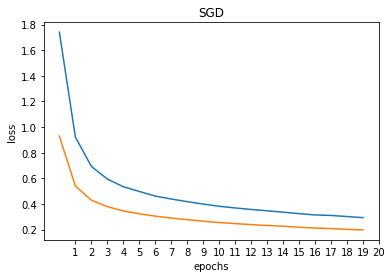

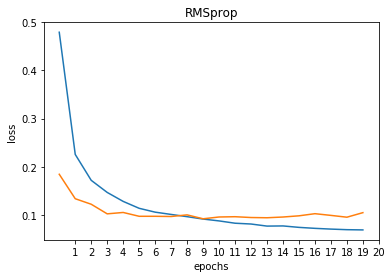

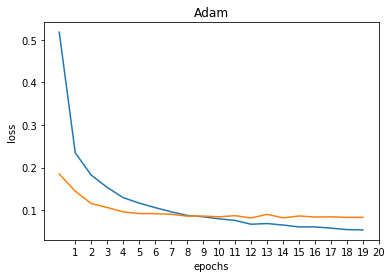

In [54]:
for key in optimizers.keys():
    plot_keras_history(
        history=results[key], 
        epochs=NB_EPOCH, 
        title=key)